# Regression with scikit-learn

We want to explore how to use scikit-learn for linear regression. This includes preparing the data, training the model, and evaluating and visualizing the results.

We will use the following modules for this:
* [sklearn.datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html): Tools for using common datasets for ML or for generating synthetic data
* [sklearn.model_selection](https://scikit-learn.org/stable/api/sklearn.model_selection.html): Tools for data splitting, cross-validation, and parameter tuning
* [sklearn.linear_model](https://scikit-learn.org/stable/api/sklearn.linear_model.html): Collection of linear models for regression and classification
* [sklearn.metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html): Collection of various metrics for model evaluation

**In general, also refer to the comprehensive [User Guide](https://scikit-learn.org/stable/user_guide.html) from scikit-learn.**

In [4]:
# Just in case we need help
# Import bia-bob as a helpful Python & Medical AI expert
from bia_bob import bob
import os

bob.initialize(
    endpoint='https://kiara.sc.uni-leipzig.de/api/v1', 
    model="vllm-llama-4-scout-17b-16e-instruct",
    system_prompt=os.getenv('SYSTEM_PROMPT_MEDICAL_AI')
)

In [5]:
%bob Who are you ? Just 1 sentence!

I am a medical data science AI assistant, an expert in Python programming and data analysis with extensive experience working with various medical datasets.

## Regression on synthetic data

### Data preparation

For a start and to show the concepts of model training with scikit-learn, we generate synthetic data for a simple regression problem.  
We use [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html):
* To get 500 data points (samples) with one feature each in `X`,
* To predict a target variable `y`,
* And add some noise

In [6]:
from sklearn.datasets import make_regression

# We use the established notation: X for Features, y for Target
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=30.0,
    random_state=42
)

Let's examine some basic properties of the data

In [7]:
print("Type X:", type(X))
print("Shape X:", X.shape)
print("First X:", X[0])
print("Type y:", type(y))
print("Shape y:", y.shape)
print("First y:", y[0])

Type X: <class 'numpy.ndarray'>
Shape X: (500, 1)
First X: [-0.80829829]
Type y: <class 'numpy.ndarray'>
Shape y: (500,)
First y: -37.79251664264387


As we can see, the data is be provided as [NumPy ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html).  
To make the data a little more convenient to work with, we can also load it into a pandas dataframe.

In [ ]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['feature'])
df['target'] = y

Pandas provides quite useful methods to get an overview on the data.

In [9]:
# Information about the variables, datatypes, and missing data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  500 non-null    float64
 1   target   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
# Descriptive statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature,500.0,0.006838,0.981253,-3.241267,-0.700307,0.012797,0.636783,3.852731
target,500.0,-0.745152,68.555808,-241.992474,-47.360061,-2.164537,37.533155,270.931008


We also can compute and plot the correlation matrix of the data to see how our feature correlates with the target

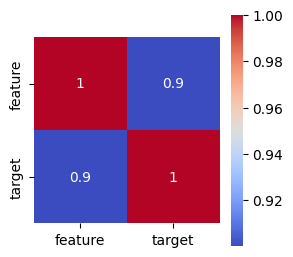

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation matrix
corr = df.corr()

# Visualize the correlation matrix as heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

Let's visualize the generated data to get a better understanding.

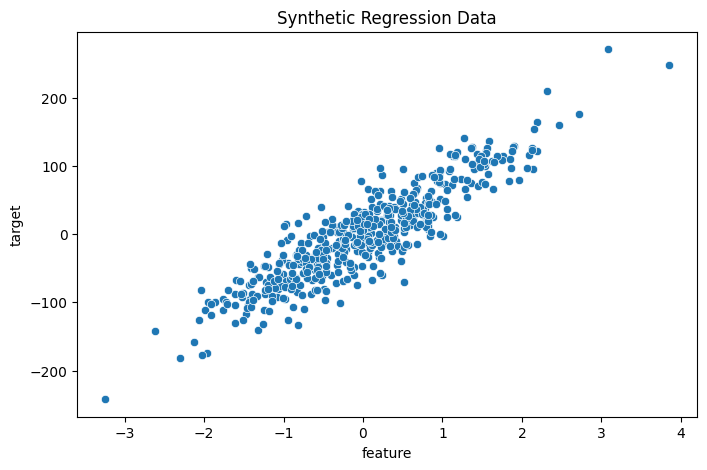

In [14]:
# Create a scatterplot with seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='feature', y='target')
plt.title('Synthetic Regression Data')
plt.show()

### Train-test split

Now we split the data for training and model testing / evaluation in order to verify the generalization of the trained model on unknown data.  
For this purpose, we can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [15]:
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("training data:", X_train.shape, "training labels:", y_train.shape)
print("test data:", X_test.shape, "test labels:", y_test.shape)

training data: (400, 1) training labels: (400,)
test data: (100, 1) test labels: (100,)


### Select and train a model

* We import the model [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and initialize the corresponding Python object using `()`
* Model training is started using the method [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) — almost all models and algorithms in scikit-learn have this method
* We pass the training data to this method, divided into features `X_train` and target `y_train`
* The model parameters are now adjusted to predict the target as accurately as possible based on the associated feature

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

In [17]:
# Supervised training - “Fitting” the model to the training data with known labels
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Prediction and evaluation

We now want to check how well the model can predict the target for previously unknown features.

* The prediction is performed using the method [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) – almost all models and algorithms in scikit-learn have this method.
* We pass the features of the test data to this method and receive the corresponding predictions of the target.

In [18]:
# Prediction on unseen test data
y_pred = model.predict(X_test)

We can now compare the predictions with the known target values of the test data and derive metrics for evaluating the model quality.

* A metric provided by LinearRegression itself is the so-called `r2` score (coefficient of determination of a regression), which evaluates the overall goodness of fit
* Other suitable regression metrics are described, for example, in the [User Guide - Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* We also choose the [Mean Absolute Error (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
* In general, it makes sense to calculate several metrics in order to get a better impression of the model quality

In [19]:
from sklearn.metrics import mean_absolute_error

# Metrics for determining model quality

# r^2 score, between 0.0 and 1.0, higher is better
r2_score = model.score(X_test, y_test)
print(f"r^2 score on test data: {r2_score:.3f}")

# Calculate mean absolute error (MAE), the best is 0.0
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test data: {mse:.3f}")

r^2 score on test data: 0.808
Mean Absolute Error (MAE) on test data: 23.094


In addition, some models offer the option to retrieve the adjusted model parameters. For LinearRegression, these are:
* Regression coefficient (_slope_): the slope of the regression line
* Intercept: intersection with the y-axis

In [20]:
# Output of the learned model parameters
print("Regression coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Regression coefficient: [62.07145267]
Intercept: -1.5459169069668393


### Visualization of the results

Finally, let's visualize all aspects for a better understanding:
* The distribution of training data
* The distribution of test data
* The regression line generated by our model

**Sound's complicated, right? Let's ask our assistant bia-bob!**

In [72]:
%%bob
From a trained regression model, I have this variables:
* training data: X_train with shape {X_train.shape}, y_train with shape {y_train.shape}
* test data: X_test with shape {X_test.shape}, y_test with shape {y_test.shape}
* trained schikit-learn LinearRegression model: {model}

I want you to visualize training data, test data, and regression line of the trained model in one plot using seaborn.

Here's a Python code snippet to visualize the training data, test data, and regression line of the trained model using seaborn:



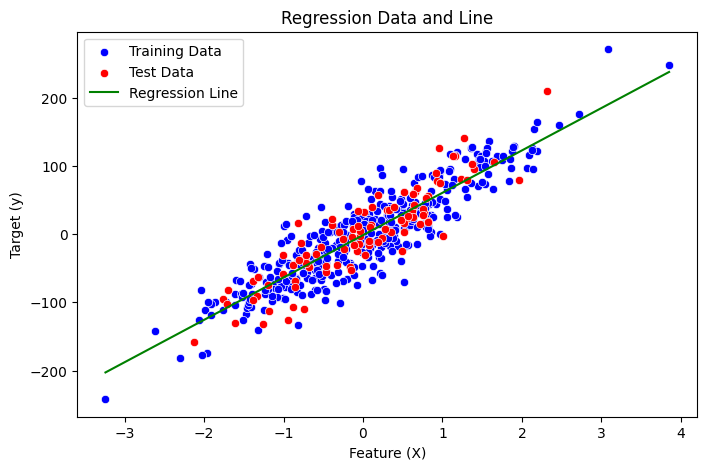

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a pandas DataFrame for training and test data
df_train = pd.DataFrame({'X': X_train.flatten(), 'y': y_train})
df_test = pd.DataFrame({'X': X_test.flatten(), 'y': y_test})

# Create a scatterplot with seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x='X', y='y', label='Training Data', color='blue')
sns.scatterplot(data=df_test, x='X', y='y', label='Test Data', color='red')

# Plot regression line
x_range = np.linspace(X_train.min(), X_train.max()).reshape(-1, 1)
y_pred_line = model.predict(x_range)
plt.plot(x_range, y_pred_line, label='Regression Line', color='green')

# Set labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Regression Data and Line')
plt.legend()

# Show the plot
plt.show()

## Exercise: Regression on Diabetes Data

Now we want to train a regression model on the more complex [scikit-learn diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

This data contains variables for age, sex, body mass index, average blood pressure, and blood serum measurements obtained for 422 diabetes patients. The target value we want to predict is a quantitative measure of disease progression one year after baseline.

**If you get stuck, remember that our assistant bia-bob is available and very happy to help you.**

### Data preparation

In [23]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [24]:
# Check the available methods / objects first
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [25]:
# Let's get our X,y first
X = diabetes.data
y = diabetes.target
# And here we also have proper labels for our features
feature_labels = diabetes.feature_names

In [26]:
print("Type X:", type(X))
print("Shape X:", X.shape)
print("First X:", X[0])
print("Labels X:", feature_labels)

Type X: <class 'numpy.ndarray'>
Shape X: (442, 10)
First X: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
Labels X: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [27]:
print("Type y:", type(y))
print("Shape y:", y.shape)
print("First y:", y[0])

Type y: <class 'numpy.ndarray'>
Shape y: (442,)
First y: 151.0


In [28]:
# ToDo: understand the data better

### Train-test split

In [29]:
# ToDo: create data for training and test

### Select and train a model

In [30]:
# ToDo: initialize and train a regression model

### Prediction and evaluation

In [31]:
# ToDo: evaluate the model quality